In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Importing the dataset**

In [19]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
print(data.shape)
data.info()



(400, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [21]:
data.drop("User ID", axis = 1, inplace = True)

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [22]:
print(data.describe())

              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000


In [25]:
data_df = pd.get_dummies(data, columns = ['Gender'], drop_first=True)
data_df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


**Splitting the dataset into the Training set and Test set**

In [26]:
X = data_df.drop("Purchased", axis = 1)
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train

,Age,EstimatedSalary,Gender_Male
253,37,146000,0
79,26,17000,0
344,47,105000,1
11,26,52000,0
147,41,30000,0
...,...,...,...
199,35,22000,1
269,40,61000,1
369,54,26000,0
229,42,80000,0


**Feature Scaling**

In [35]:
col=X.columns
print(col)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = col)
X_test = pd.DataFrame(X_test, columns = col)
print(X_train)

Index(['Age', 'EstimatedSalary', 'Gender_Male'], dtype='object')
          Age  EstimatedSalary  Gender_Male
0    0.452381         0.970370          0.0
1    0.190476         0.014815          0.0
2    0.690476         0.666667          1.0
3    0.190476         0.274074          0.0
4    0.547619         0.111111          0.0
..        ...              ...          ...
275  0.404762         0.051852          1.0
276  0.523810         0.340741          1.0
277  0.857143         0.081481          0.0
278  0.571429         0.481481          0.0
279  0.738095         0.155556          0.0

[280 rows x 3 columns]


**Fitting K-NN to the Training set**

Silhouette method
For n_clusters=2 the silhouette score is 0.6063279048382056
For n_clusters=3 the silhouette score is 0.5232033695125532
For n_clusters=4 the silhouette score is 0.526854813973541
For n_clusters=5 the silhouette score is 0.3528656571589448
For n_clusters=6 the silhouette score is 0.40649866465864537
For n_clusters=7 the silhouette score is 0.39223112671614757
For n_clusters=8 the silhouette score is 0.3892789465055405


Elbow curve method


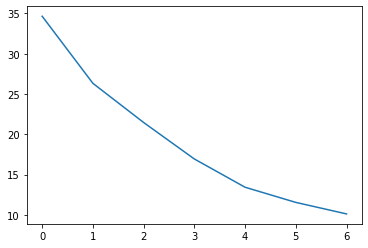

In [84]:
# Finding no of clusters

ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
print("Silhouette method")
for i in range_n_clusters:
    kmeans=KMeans(n_clusters=i,max_iter=50)
    #K_iter=KNeighborsClassifier(n_neighbors=i,metric = 'minkowski', p=2)
    kmeans.fit(X_train)
    ssd.append(kmeans.inertia_)
    cluster_label=kmeans.labels_
    silhouette_avg=silhouette_score(X_train,cluster_label)
    
    print("For n_clusters={0} the silhouette score is {1}".format(i,silhouette_avg))
print("\n")
print("Elbow curve method")
plt.plot(ssd)

In [ ]:
#Based on analysis on elbow curve method and silhoutte analysis , we can choose 4 clusters
k=3

In [74]:
knn_classifier = KNeighborsClassifier(n_neighbors=3,metric = 'minkowski', p=2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Predicting the Test set results**

In [75]:
y_pred = knn_classifier.predict(X_test)

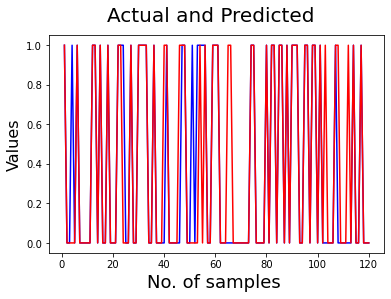

In [76]:
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure()
#Plotting Actual
plt.plot(c,y_test, color = 'blue', linewidth = 1.5, linestyle = "-")
#Plotting predicted
plt.plot(c, y_pred, color = 'red', linewidth = 1.5, linestyle = "-")
# Plot heading 
fig.suptitle('Actual and Predicted', fontsize = 20)
# X-label
plt.xlabel('No. of samples ', fontsize = 18)
# Y-label
plt.ylabel('Values', fontsize = 16)
#showing the plot
plt.show()

**Making the Confusion Matrix**

In [77]:
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("Confusion Matix")
print(cm)

print("\n")
tp,fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
print(f'Correctly Predicted made Purchase {tp}')
print(f'Falsely Predicted made Purchase {fp}')
print(f'Falsely Predicted made did NOT made Purchase {fn}')
print(f'Correctly Predicted made did NOT made Purchase {tn}')

Accuracy: 0.9
Precision: 0.8541666666666666
Recall: 0.8913043478260869
Confusion Matix
[[67  7]
 [ 5 41]]


Correctly Predicted made Purchase 67
Falsely Predicted made Purchase 7
Falsely Predicted made did NOT made Purchase 5
Correctly Predicted made did NOT made Purchase 41
